## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [234]:
df = pd.read_csv('data/kc_house_data.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [235]:
df.loc[df['waterfront'].isna() == True, 'waterfront'] = "NO"

In [236]:
df.loc[df['view'].isna() == True, 'view'] = "NONE"

In [237]:
df['waterfront'] = df.waterfront.map(lambda x: 0 if x=='NO' else 1)

In [238]:
df.drop(['id', 'date', 'zipcode', 'lat', 'long', 'yr_renovated', 'view'], axis=1, inplace=True)

In [239]:
df.loc[df.sqft_basement == '?', 'sqft_basement'] = (df[df.sqft_basement == '?'].sqft_living
                               - df[df.sqft_basement == '?'].sqft_above)

In [240]:
df['sqft_basement'] = df.sqft_basement.astype('float64')

In [241]:
#sqft basement is a zero inflated varaible so I will make a new binary
#variable to show if there is a basment

In [242]:
df['is_basement'] = df.sqft_basement.map(lambda x: 0 if x == 0 else 1)

In [243]:
df.drop('sqft_basement', axis=1, inplace=True)

In [245]:
df['condition'] = df.condition.map(lambda x: 0 if x=='Poor' 
                                   else (1 if x=='Fair'
                                    else (2 if x=='Average'
                                    else  (3 if x=='Good' else 4))))

In [247]:
df['grade'] = df.grade.map(lambda x: int(x[0:2]))

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  yr_built       21597 non-null  int64  
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
 13  is_basement    21597 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [427]:
X = df[df.price < 1000000].drop('price', axis=1)
y = df[df.price < 1000000].price

In [428]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [209]:
cont_data = df.loc[:, ((df.dtypes != 'object') & (df.nunique() > 120))].drop(
                                                    'price', axis=1)

In [210]:
cont_data

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
0,1180,5650,1180,1340,5650
1,2570,7242,2170,1690,7639
2,770,10000,770,2720,8062
3,1960,5000,1050,1360,5000
4,1680,8080,1680,1800,7503
...,...,...,...,...,...
21592,1530,1131,1530,1530,1509
21593,2310,5813,2310,1830,7200
21594,1020,1350,1020,1020,2007
21595,1600,2388,1600,1410,1287


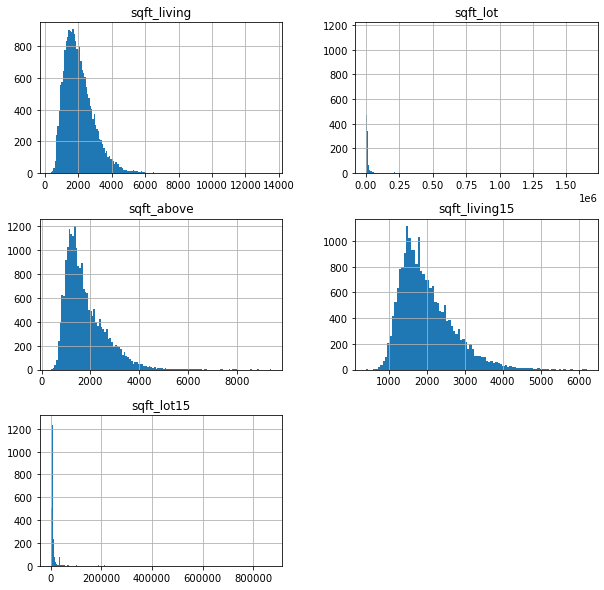

In [211]:
cont_data.hist(figsize=(10,10), bins='auto');

In [212]:
#the continuous variable are skewed so i will apply log transforms

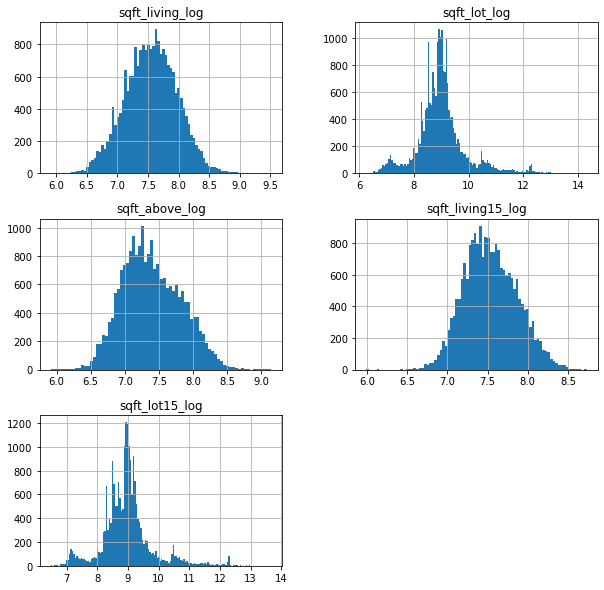

In [213]:
log_names = [f'{column}_log' for column in cont_data.columns]

cont_log = np.log(cont_data);
cont_log.columns = log_names;
cont_log.hist(figsize=(10, 10), bins='auto');

In [214]:
df.drop(cont_data.columns, axis=1, inplace=True)

In [215]:
data = pd.concat([df,cont_log],  axis=1)

In [365]:
data

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,is_basement,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_lot15_log
0,221900.0,3,1.00,1.0,0,2,7,1955,0,7.073270,8.639411,7.073270,7.200425,8.639411
1,538000.0,3,2.25,2.0,0,2,7,1951,1,7.851661,8.887653,7.682482,7.432484,8.941022
2,180000.0,2,1.00,1.0,0,2,6,1933,0,6.646391,9.210340,6.646391,7.908387,8.994917
3,604000.0,4,3.00,1.0,0,4,7,1965,1,7.580700,8.517193,6.956545,7.215240,8.517193
4,510000.0,3,2.00,1.0,0,2,8,1987,0,7.426549,8.997147,7.426549,7.495542,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,3.0,0,2,8,2009,0,7.333023,7.030857,7.333023,7.333023,7.319202
21593,400000.0,4,2.50,2.0,0,2,8,2014,0,7.745003,8.667852,7.745003,7.512071,8.881836
21594,402101.0,2,0.75,2.0,0,2,7,2009,0,6.927558,7.207860,6.927558,6.927558,7.604396
21595,400000.0,3,2.50,2.0,0,2,8,2004,0,7.377759,7.778211,7.377759,7.251345,7.160069


In [340]:
data.corr()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,is_basement,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_lot15_log
price,1.000000,0.308787,0.525906,0.256804,0.264306,0.036056,0.667951,0.053953,0.180082,0.611839,0.161561,0.542675,0.543829,0.147913
bedrooms,0.308787,1.000000,0.514508,0.177944,-0.002127,0.026496,0.356563,0.155670,0.162186,0.621820,0.184922,0.516072,0.406631,0.162238
bathrooms,0.525906,0.514508,1.000000,0.502582,0.063629,-0.126479,0.665838,0.507173,0.162766,0.762135,0.100624,0.695839,0.571796,0.091975
floors,0.256804,0.177944,0.502582,1.000000,0.020797,-0.264075,0.458794,0.489193,-0.256545,0.367564,-0.237460,0.547619,0.275476,-0.227223
waterfront,0.264306,-0.002127,0.063629,0.020797,1.000000,0.016648,0.082818,-0.024487,0.040061,0.078900,0.072340,0.059125,0.076503,0.081562
condition,0.036056,0.026496,-0.126479,-0.264075,0.016648,1.000000,-0.146896,-0.361592,0.135211,-0.049620,0.073694,-0.150730,-0.089255,0.079862
grade,0.667951,0.356563,0.665838,0.458794,0.082818,-0.146896,1.000000,0.447865,0.051255,0.743038,0.184323,0.742869,0.689054,0.185000
yr_built,0.053953,0.155670,0.507173,0.489193,-0.024487,-0.361592,0.447865,1.000000,-0.167844,0.349689,-0.007287,0.451397,0.333819,0.018759
is_basement,0.180082,0.162186,0.162766,-0.256545,0.040061,0.135211,0.051255,-0.167844,1.000000,0.237156,-0.050144,-0.217167,0.063179,-0.055472
sqft_living_log,0.611839,0.621820,0.762135,0.367564,0.078900,-0.049620,0.743038,0.349689,0.237156,1.000000,0.325983,0.864979,0.746836,0.303058


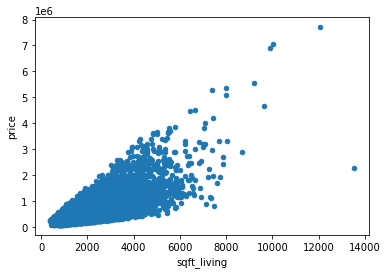

In [357]:
df.plot.scatter(x='sqft_living', y='price');

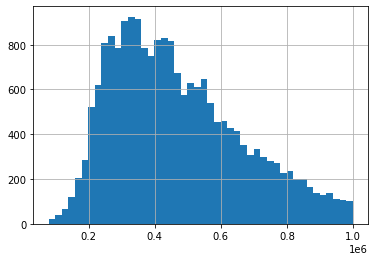

In [361]:
df[df.price < 1000000].price.hist(bins='auto');

In [362]:
y = np.log(df.price)

<AxesSubplot:>

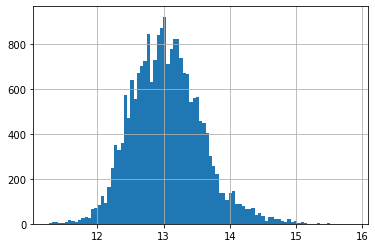

In [364]:
y.hist(bins='auto')

## Baseline Model

In [218]:
baseline_model = LinearRegression()

In [274]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=df[['sqft_living']],
    y=df[['price']],
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.48774659364870426
Validation score: 0.5024006604207555


In [366]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=data.drop('price', axis=1),
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.6555388283863258
Validation score: 0.6731097985557474


In [355]:
import statsmodels.api as sm

sm.OLS(df[['price']], sm.add_constant(df['sqft_living'])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:58:26   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [373]:
significant_features = ["bedrooms", "bathrooms", "floors", "waterfront", "condition",
                       "grade", "yr_built", "sqft_above",
                       "sqft_living", "sqft_living15", "sqft_lot15"]

In [352]:
# significant_features = ["bedrooms", "floors", "waterfront", "condition",
#                         "yr_built", "sqft_living", "sqft_lot15"]

In [349]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=df[significant_features],
    y=df[['price']],
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.5787690757688785
Validation score: 0.6057697131621445


In [417]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
data_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(data_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
waterfront: True
condition: True
grade: True
sqft_above: True
yr_built: True
sqft_living15: True
sqft_lot15: True
is_basement: True


In [337]:
selector.ranking_

array([1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [374]:
sm.OLS(df[['price']], sm.add_constant(df[significant_features])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3612.
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:13:54   Log-Likelihood:            -2.9612e+05
No. Observations:               21597   AIC:                         5.923e+05
Df Residuals:                   21585   BIC:                         5.924e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.67e+06    1.3e+05     51.174      0.000    6.41e+06    6.93e+06
bedrooms      -4.287e+04   2045.832    -20.953      0.000   -4.69e+04   -3.89e+04
bathrooms      4.897e+04   3506.814     13.964      0.000    4.21e+04    5.58e+04
floors         3.029e+04   3815.635      7.939      0.000    2.28e+04    3.78e+04
waterfront     7.522e+05   1.83e+04     41.070      0.000    7.16e+05    7.88e+05
condition      1.896e+04   2486.019      7.627      0.000    1.41e+04    2.38e+04
grade          1.246e+05   2269.043     54.913      0.000     1.2e+05    1.29e+05
yr_built      -3823.5685     67.337    -56.783      0.000   -3955.553   -3691.584
sqft_above      -21.6339      4.504     -4.804      0.000     -30.461     -12.807
sqft_living     180.8186      4.658     38.817      0.000     171.688     189.949
sqft_living15    33.6330      3.596      9.353      0.000      26.584      40.682
sqft_lot15       -0.5288      0.056     -9.373      0.000      -0.639      -0.418
==============================================================================
Omnibus:                    16309.489   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1140922.051
Skew:                           3.043   Prob(JB):                         0.00
Kurtosis:                      38.083   Cond. No.                     2.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [283]:
final_model = LinearRegression()
final_model.fit(df[significant_features], df[['price']])

LinearRegression()

In [285]:
final_model.coef_

array([[-4.14791608e+04,  5.16322344e+04,  2.24198166e+04,
         7.55344755e+05,  1.89900533e+04,  1.30404561e+05,
        -3.86465875e+03,  1.73690931e+02]])

In [287]:
df[significant_features].columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'sqft_living'],
      dtype='object')

In [294]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()


In [297]:
cont_log_norm = cont_log.apply(normalize)

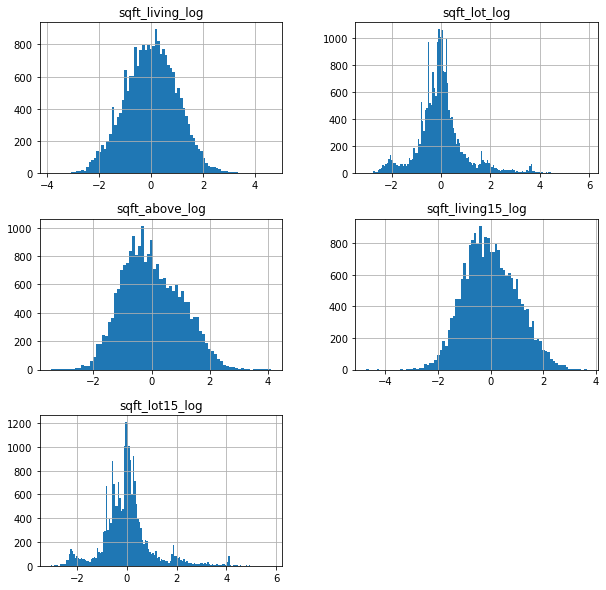

In [332]:
cont_log_norm.hist(figsize=(10, 10), bins='auto');

In [301]:
data_norm = data.drop('price', axis=1).apply(normalize)

In [302]:
data_norm

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,is_basement,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_lot15_log
0,-0.402894,-1.451039,-0.915531,-0.082498,-0.629972,-0.560787,-0.544665,-0.804573,-1.125556,-0.388430,-0.753565,-1.035429,-0.395450
1,-0.402894,0.174482,0.937409,-0.082498,-0.629972,-0.560787,-0.680835,1.242837,0.709446,-0.113241,0.672693,-0.326781,-0.024287
2,-1.482459,-1.451039,-0.915531,-0.082498,-0.629972,-1.413157,-1.293596,-0.804573,-2.131893,0.244475,-1.752954,1.126504,0.042036
3,0.676671,1.149794,-0.915531,-0.082498,2.444371,-0.560787,-0.204243,1.242837,0.070674,-0.523914,-1.026835,-0.990187,-0.545850
4,-0.402894,-0.150622,-0.915531,-0.082498,-0.629972,0.291583,0.544688,-0.804573,-0.292725,0.008139,0.073515,-0.134218,-0.046394
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.402894,0.499586,2.790349,-0.082498,-0.629972,0.291583,1.293618,-0.804573,-0.513206,-2.171594,-0.145444,-0.630509,-2.020096
21593,0.676671,0.499586,0.937409,-0.082498,-0.629972,0.291583,1.463829,-0.804573,0.458007,-0.356901,0.819063,-0.083742,-0.097121
21594,-1.482459,-1.776143,0.937409,-0.082498,-0.629972,-0.560787,1.293618,-0.804573,-1.469061,-1.975378,-1.094699,-1.868694,-1.669137
21595,-0.402894,0.499586,0.937409,-0.082498,-0.629972,0.291583,1.123406,-0.804573,-0.407744,-1.343114,-0.040710,-0.879932,-2.215926


In [303]:
final_data = pd.concat([df[['price']], data_norm], axis=1)

In [307]:
second_model = LinearRegression()

In [409]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25)

baseline_scores = cross_validate(
    estimator=second_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.5557100282852672
Validation score: 0.5695917056277439


In [342]:
df.corr() > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,is_basement
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,False


In [344]:
df2=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to pairs
df2.set_index(['pairs'], inplace = True)

#d rop level columns
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df2.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df2.drop_duplicates(inplace=True)

In [346]:
df2[(df2.cc>.75) & (df2.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073
"(sqft_living, bathrooms)",0.755758


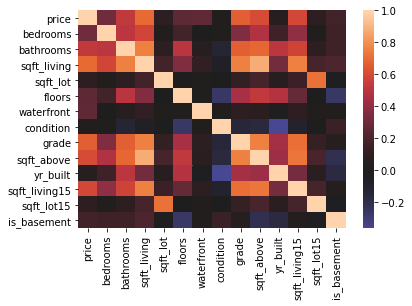

In [347]:
import seaborn as sns
sns.heatmap(df.corr(), center=0);

In [404]:
X_train_final = X_train[significant_features]
X_test_final = X_test[significant_features]

In [429]:
final_model = LinearRegression()

In [430]:
final_model.fit(X_train, y_train)

LinearRegression()

In [431]:
final_model.score(X_test, y_test)

0.5701592024484239

In [432]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test), squared=False)

127465.61907283985

In [434]:
print(pd.Series(final_model.coef_, index=X_train.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

bedrooms         -11376.521905
bathrooms         23764.106315
sqft_living          41.419452
sqft_lot              0.205830
floors            55322.997343
waterfront       172654.250182
condition         17631.228853
grade             86476.154816
sqft_above           11.880074
yr_built          -2591.384609
sqft_living15        60.894493
sqft_lot15           -0.241134
is_basement       44100.825785
Name: Coefficients, dtype: float64

Intercept: 4556465.687338863


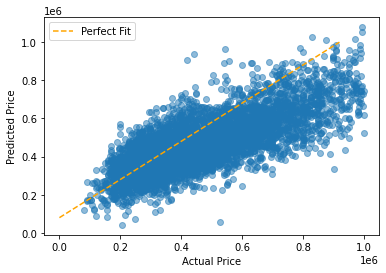

In [435]:
preds = final_model.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

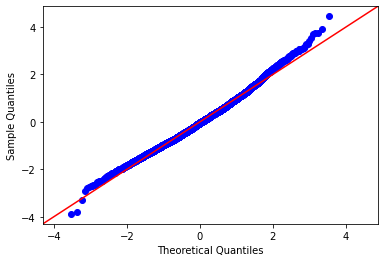

In [436]:
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [439]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.Series(vif, index=X_train.columns, name="Variance Inflation Factor")

bedrooms          23.021268
bathrooms         24.359220
sqft_living      111.238507
sqft_lot           2.469653
floors            16.564026
waterfront         1.004619
condition         16.100596
grade            148.919452
sqft_above       101.384623
yr_built         120.390321
sqft_living15     28.416506
sqft_lot15         2.647257
is_basement        5.982918
Name: Variance Inflation Factor, dtype: float64

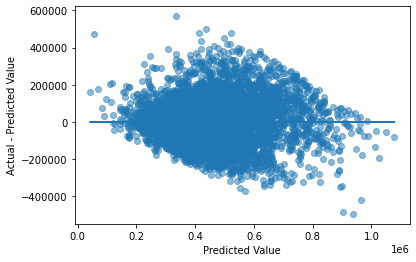

In [440]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");